<a href="https://colab.research.google.com/github/Effendy8/Project-Kelas-Work/blob/master/04_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

local_zip = '/content/archive (10).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()


### Data Preparation

In [ ]:
import os
fold_boot = os.path.join('/content/Shoe vs Sandal vs Boot Dataset/Boot')
fold_sandal = os.path.join('/content/Shoe vs Sandal vs Boot Dataset/Sandal')
fold_shoe = os.path.join('/content/Shoe vs Sandal vs Boot Dataset/Shoe')

print('Jumlah total gambar boot:', len(os.listdir(fold_boot)))
print('Jumlah total gambar sandal:', len(os.listdir(fold_sandal)))
print('Jumlah total gambar shoe:', len(os.listdir(fold_shoe)))

print("Menampilkan nama file gambar:")
file_boot = os.listdir(fold_boot)
print("Boot:",file_boot[:5])

file_sandal = os.listdir(fold_sandal)
print("Sandal:",file_sandal[:5])

file_shoe = os.listdir(fold_shoe)
print("Shoe:",file_shoe[:5])


Jumlah total gambar boot: 5000
Jumlah total gambar sandal: 5000
Jumlah total gambar shoe: 5000
Menampilkan nama file gambar:
Boot: ['boot (342).jpg', 'boot (1946).jpg', 'boot (1221).jpg', 'boot (4240).jpg', 'boot (2267).jpg']
Sandal: ['Sandal (4196).jpg', 'Sandal (2742).jpg', 'Sandal (1493).jpg', 'Sandal (1404).jpg', 'Sandal (1775).jpg']
Shoe: ['Shoe (1887).jpg', 'Shoe (2020).jpg', 'Shoe (4358).jpg', 'Shoe (2755).jpg', 'Shoe (639).jpg']


### Exploratory Data Analysis

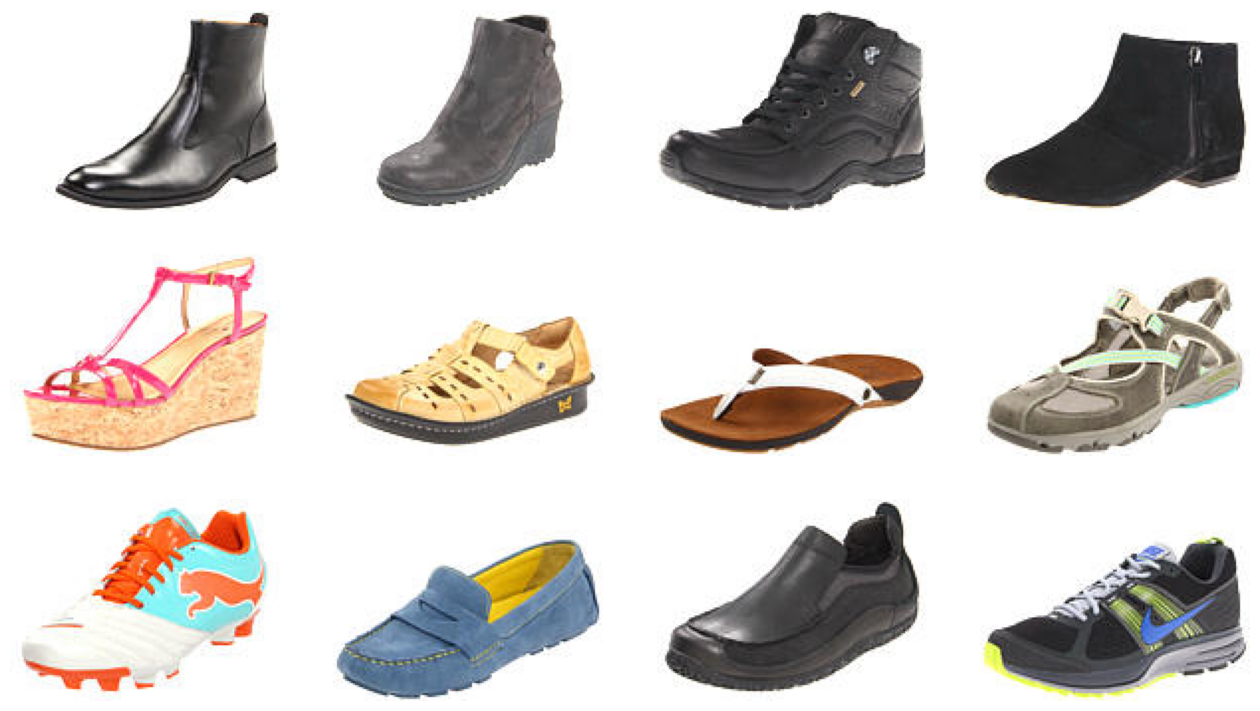

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4
gbr_tampil_boot = [os.path.join(fold_boot, fname)
                for fname in file_boot[pic_index-4:pic_index]]
gbr_tampil_sandal = [os.path.join(fold_sandal, fname)
                for fname in file_sandal[pic_index-4:pic_index]]
gbr_tampil_shoe = [os.path.join(fold_shoe, fname)
                for fname in file_shoe[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_boot+gbr_tampil_sandal+gbr_tampil_shoe):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Menggunakan Image Generator

In [ ]:
import tensorflow as tf                                   #mengimpor modul tensorflow
!pip install keras_preprocessing
import keras_preprocessing                                #mengimpor modul keras
from keras_preprocessing import image                     #mengimpor keras_preprocessing untuk gambar
from keras_preprocessing.image import ImageDataGenerator  #mengimpor ImageGenerator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


#### Melakukan Augmentasi & Pemisahan Data Menjadi Training dan Validation

In [ ]:
BASIS_DIR = "/content/Shoe vs Sandal vs Boot Dataset"                     #menyiapkan folder utama
training_datagen = ImageDataGenerator(                                    #Image generator
                    rescale=1./255,                                       #menormalisasi data
                    rotation_range=40,                                    #menerapkan skenario rotasi gambar hingga 40 derajat
                    width_shift_range=0.2,                                #menerapkan skenario pelebaran gambar hingga 20%
                    height_shift_range=0.2,                               #menerapkan skenario peninggian gambar hingga 20%
                    shear_range=0.2,                                      #menerapkan skenariopemangkasan gambar hingga 20%
                    zoom_range=0.2,                                       #menerapkan skenario zoom gambar hingga 20%
                    horizontal_flip=True,                                 #menerapkan skenario putar balik gambar secara horizontal
                    fill_mode='nearest',                                  #menerapkan piksel yang kosong dengan nilai piksel terdekat
                    validation_split=0.2)                                 #80% Data Training, 20% Data Validasi

#### Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(      #Generator data Training
        BASIS_DIR,                                           #Folder target untuk digenerasi
        target_size=(150, 150),                              #mengubah resolusi seluruh gambar menjadi 150x150 pixel
        class_mode='categorical',                            #kelas data kategori untuk klasifikasi multivariabel
        shuffle=True,
        subset='training')                                   #untuk data training

validation_generator = training_datagen.flow_from_directory( #Generator data Validasi
        BASIS_DIR,                                           #Folder target untuk digenerasi
        target_size=(150, 150),                              #mengubah resolusi seluruh gambar menjadi 150x150 pixel
        class_mode='categorical',                            #kelas data kategori untuk klasifikasi multivariabel
        shuffle=True,
        subset='validation')                                 #untuk data validasi

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


#### Membangun Model Jaringan Saraf Tiruan
    Model yang digunakan adalah model Sequential

In [ ]:
model = tf.keras.models.Sequential([                                                      #membuat model sequential

        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),  #bentuk input gambar ukuran 150x150 dengan 3 byte warna
        tf.keras.layers.MaxPooling2D(2, 2),                                               #layer Konvolusi 1

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #layer Konvolusi 2
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #layer Konvolusi 3
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),                                                        #layer input Deep Learning Neural Network
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu'),                                    #hidden layer pertama 128 neuron
        tf.keras.layers.Dense(512, activation='relu'),                                    #hidden layer kedua 512 neuron
        tf.keras.layers.Dense(3, activation='softmax')                                    #layer output
])

model.summary()                                                                           #menampilkan summary model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

#####Melakukan Kompilasi Model

In [ ]:
model.compile(loss = 'categorical_crossentropy',    #loss function yang digunakan untuk klasifikasi kategori > 2
              optimizer='adam',                     #fungsi optimizer Adam
              metrics=['accuracy'])                 #menampilkan akurasi model training

####Melatih Model Jaringan Saraf Tiruan

In [ ]:
history= model.fit(                           #Data Training hasil generasi
    train_generator,
    steps_per_epoch = 4,                      #Jumlah batch yang akan dieksekusi pada tiap epoch
    epochs = 50,                              #Jumlah perulangan komputasi(epoch)
    validation_data = validation_generator,   #menampilkan akurasi pengujian data validasi
    validation_steps = 4,                     #Jumlah batch yang akan dieksekusi pada tiap epoch
    verbose = 2
)

Epoch 1/50
4/4 - 6s - loss: 0.4621 - accuracy: 0.8281 - val_loss: 0.4350 - val_accuracy: 0.7969 - 6s/epoch - 2s/step
Epoch 2/50
4/4 - 4s - loss: 0.4965 - accuracy: 0.7969 - val_loss: 0.4597 - val_accuracy: 0.7812 - 4s/epoch - 1s/step
Epoch 3/50
4/4 - 5s - loss: 0.4813 - accuracy: 0.8047 - val_loss: 0.5656 - val_accuracy: 0.7734 - 5s/epoch - 1s/step
Epoch 4/50
4/4 - 5s - loss: 0.4642 - accuracy: 0.8203 - val_loss: 0.4631 - val_accuracy: 0.8359 - 5s/epoch - 1s/step
Epoch 5/50
4/4 - 5s - loss: 0.4597 - accuracy: 0.8281 - val_loss: 0.4156 - val_accuracy: 0.8281 - 5s/epoch - 1s/step
Epoch 6/50
4/4 - 4s - loss: 0.4492 - accuracy: 0.8438 - val_loss: 0.5195 - val_accuracy: 0.7969 - 4s/epoch - 1s/step
Epoch 7/50
4/4 - 7s - loss: 0.4766 - accuracy: 0.7969 - val_loss: 0.5221 - val_accuracy: 0.7891 - 7s/epoch - 2s/step
Epoch 8/50
4/4 - 5s - loss: 0.5342 - accuracy: 0.7422 - val_loss: 0.3824 - val_accuracy: 0.8438 - 5s/epoch - 1s/step
Epoch 9/50
4/4 - 6s - loss: 0.4572 - accuracy: 0.8203 - val_loss

####Ploting Akurasi Training dan Validasi

    Melihat pergerakan besaran nilai akurasi Training dan Validasi

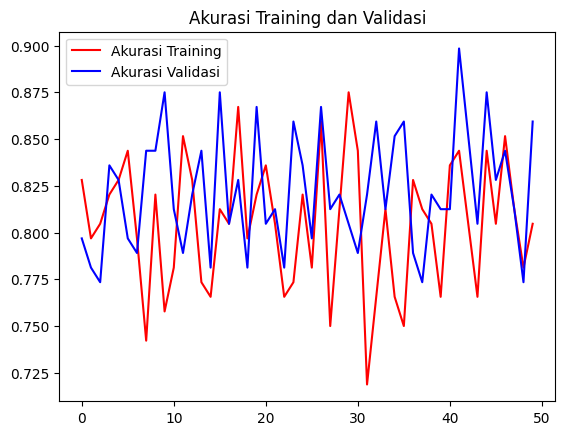

<Figure size 640x480 with 0 Axes>

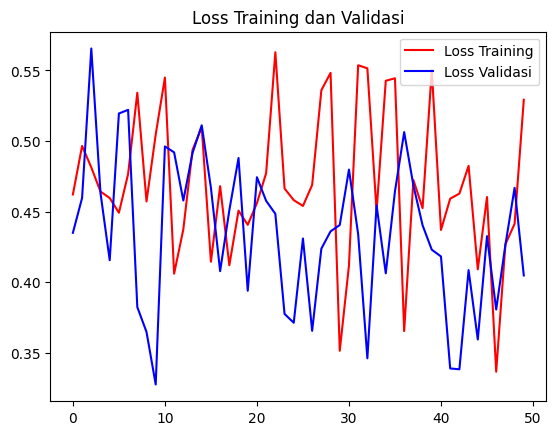

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()


### Uji Coba Model Klasifikasi Gambar Boot, Sandal dan Sepatu


Saving OIP.jpeg to OIP (1).jpeg
1/1 [==============================] - 0s 45ms/step
OIP (1).jpeg
Hasil Prediksi Gambar :Shoe


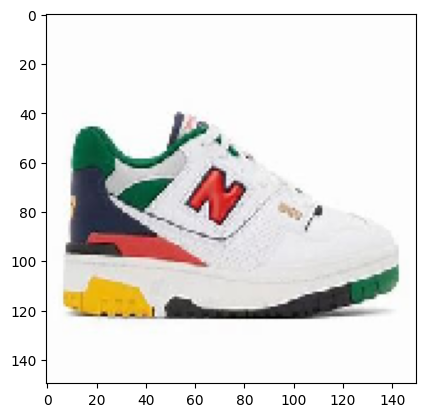

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0,0]==1:
    print('Hasil Prediksi Gambar :Boot')
  elif classes[0,1]==1:
    print('Hasil Prediksi Gambar :Sandal')
  elif classes[0,2]==1:
    print('Hasil Prediksi Gambar :Shoe')
  else:
    print('Tidak Dikenali')

